# Time Series Model for Forecasting the number of products sold

In this project, a forecasting model will be developed using facebook's phrophet pretrained model.

## Import Libraries

In [4]:
#basic python libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Prophet Library
from prophet import Prophet

c:\Users\Panther\anaconda3\envs\pyTorch_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


## Import the Data

### Import train datset

In [5]:
train_dataset = pd.read_csv("./dataset/train.csv", sep=",")
train_dataset["Date"] = pd.to_datetime(train_dataset["Date"])
train_dataset.head()

Date  store  product  number_sold
0 2010-01-01      0        0          801
1 2010-01-02      0        0          810
2 2010-01-03      0        0          818
3 2010-01-04      0        0          796
4 2010-01-05      0        0          808

### Import test datset

In [6]:
test_dataset = pd.read_csv("./dataset/test.csv", sep=",")
test_dataset["Date"] = pd.to_datetime(test_dataset["Date"])
test_dataset.head()


Date  store  product  number_sold
0 2019-01-01      0        0          845
1 2019-01-02      0        0          851
2 2019-01-03      0        0          840
3 2019-01-04      0        0          842
4 2019-01-05      0        0          845

## EDA

### The number of stores

In [7]:
train_dataset["store"].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

### The number of products

In [8]:
train_dataset["product"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

in this dataset, there are 7 stores and also 10 products. to see the trend for each product, the data will be splitted for each store and product.

### Spliting the data per store and organize per product

#### Splitting function

In [9]:
# Split data per store
def store_split_data(dataset, store):
    store_data = dataset[dataset["store"] == store]
    return store_data

In [10]:
def get_store_data(dataset):
    n_product = {}
    for i in range(10): 
        product_split = dataset[dataset["product"] == i] 
        n_product[f"n_sold_product_{i}"] = product_split
    
    return n_product  # Return dictionary of DataFrames

### Plotting Each Product at store 0

#### Split for store 0

In [11]:
store_0 = store_split_data(train_dataset, 0)
store_0["store"].unique()

array([0], dtype=int64)

In [12]:
store_0.head()

Date  store  product  number_sold
0 2010-01-01      0        0          801
1 2010-01-02      0        0          810
2 2010-01-03      0        0          818
3 2010-01-04      0        0          796
4 2010-01-05      0        0          808

In [13]:
organized_store_data = get_store_data(store_0)

In [14]:
organized_store_data["n_sold_product_0"].head()

Date  store  product  number_sold
0 2010-01-01      0        0          801
1 2010-01-02      0        0          810
2 2010-01-03      0        0          818
3 2010-01-04      0        0          796
4 2010-01-05      0        0          808

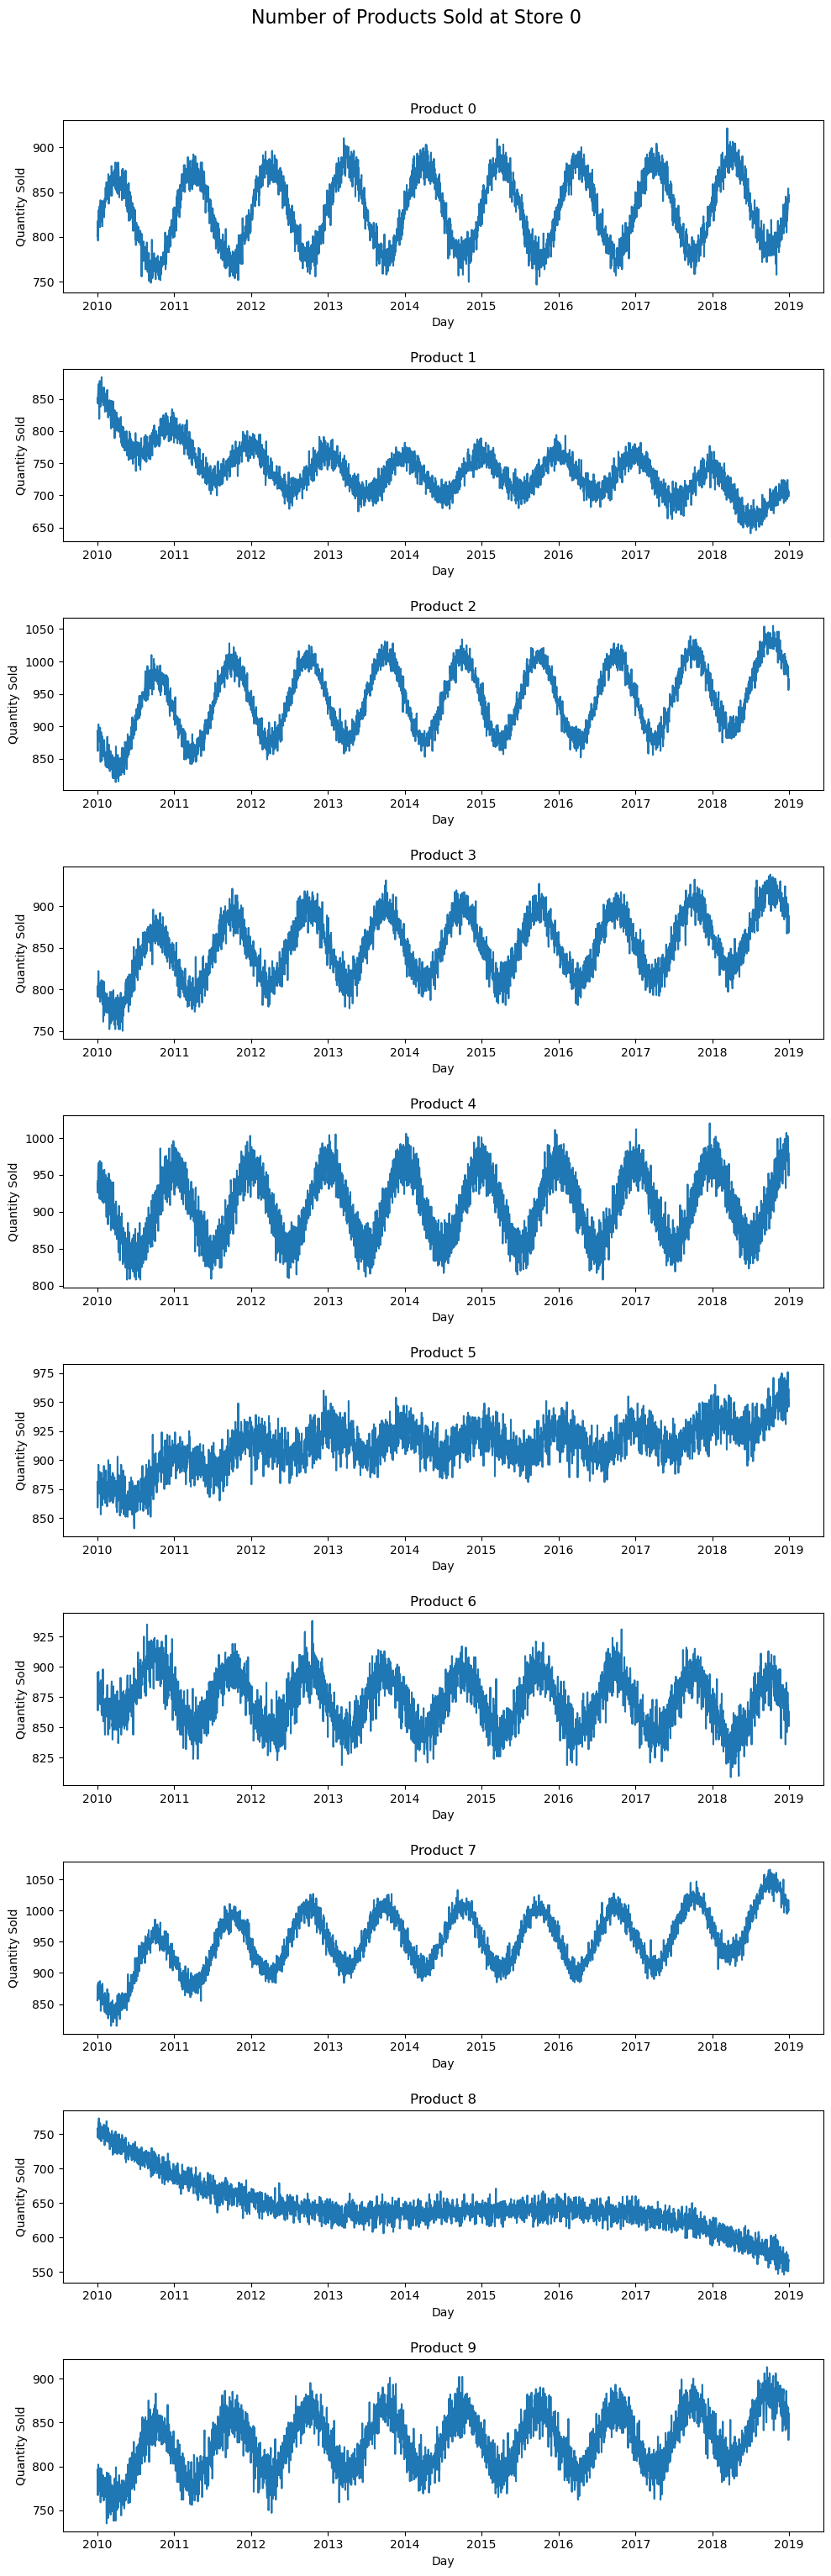

In [15]:
#Get the title
fig_titles = []

for i in range(10):
    fig_titles.append(f"Product {i}")

# Create subplots
n_rows = len(fig_titles)
fig, axes = plt.subplots(nrows=n_rows, ncols=1, figsize = (10, n_rows*3), sharex=False)

# Flatten the axes for easier handling ig there is more than one row
axes = axes if n_rows >1 else [axes]

#plot the graph
for i, col in enumerate(organized_store_data):
    ax = axes[i]
    ax.plot(organized_store_data[f"n_sold_product_{i}"]["Date"], organized_store_data[f"n_sold_product_{i}"]["number_sold"])
    ax.set_title(fig_titles[i], fontsize = 12)
    ax.set_ylabel("Quantity Sold")
    ax.set_xlabel("Day")
    
# Add Overall Title and adjust the layout
fig.suptitle("Number of Products Sold at Store 0", fontsize = 16, y = 1.02)
fig.tight_layout(h_pad=2.0)
plt.show()

### Plotting Each Product at store 1

#### Split for store 1

In [16]:
store_1 = store_split_data(train_dataset, 1)
store_1["store"].unique()

array([1], dtype=int64)

In [17]:
store_1.head()

Date  store  product  number_sold
32870 2010-01-01      1        0          686
32871 2010-01-02      1        0          680
32872 2010-01-03      1        0          707
32873 2010-01-04      1        0          674
32874 2010-01-05      1        0          696

In [18]:
organized_store_data = get_store_data(store_1)

In [19]:
organized_store_data["n_sold_product_0"].head()

Date  store  product  number_sold
32870 2010-01-01      1        0          686
32871 2010-01-02      1        0          680
32872 2010-01-03      1        0          707
32873 2010-01-04      1        0          674
32874 2010-01-05      1        0          696

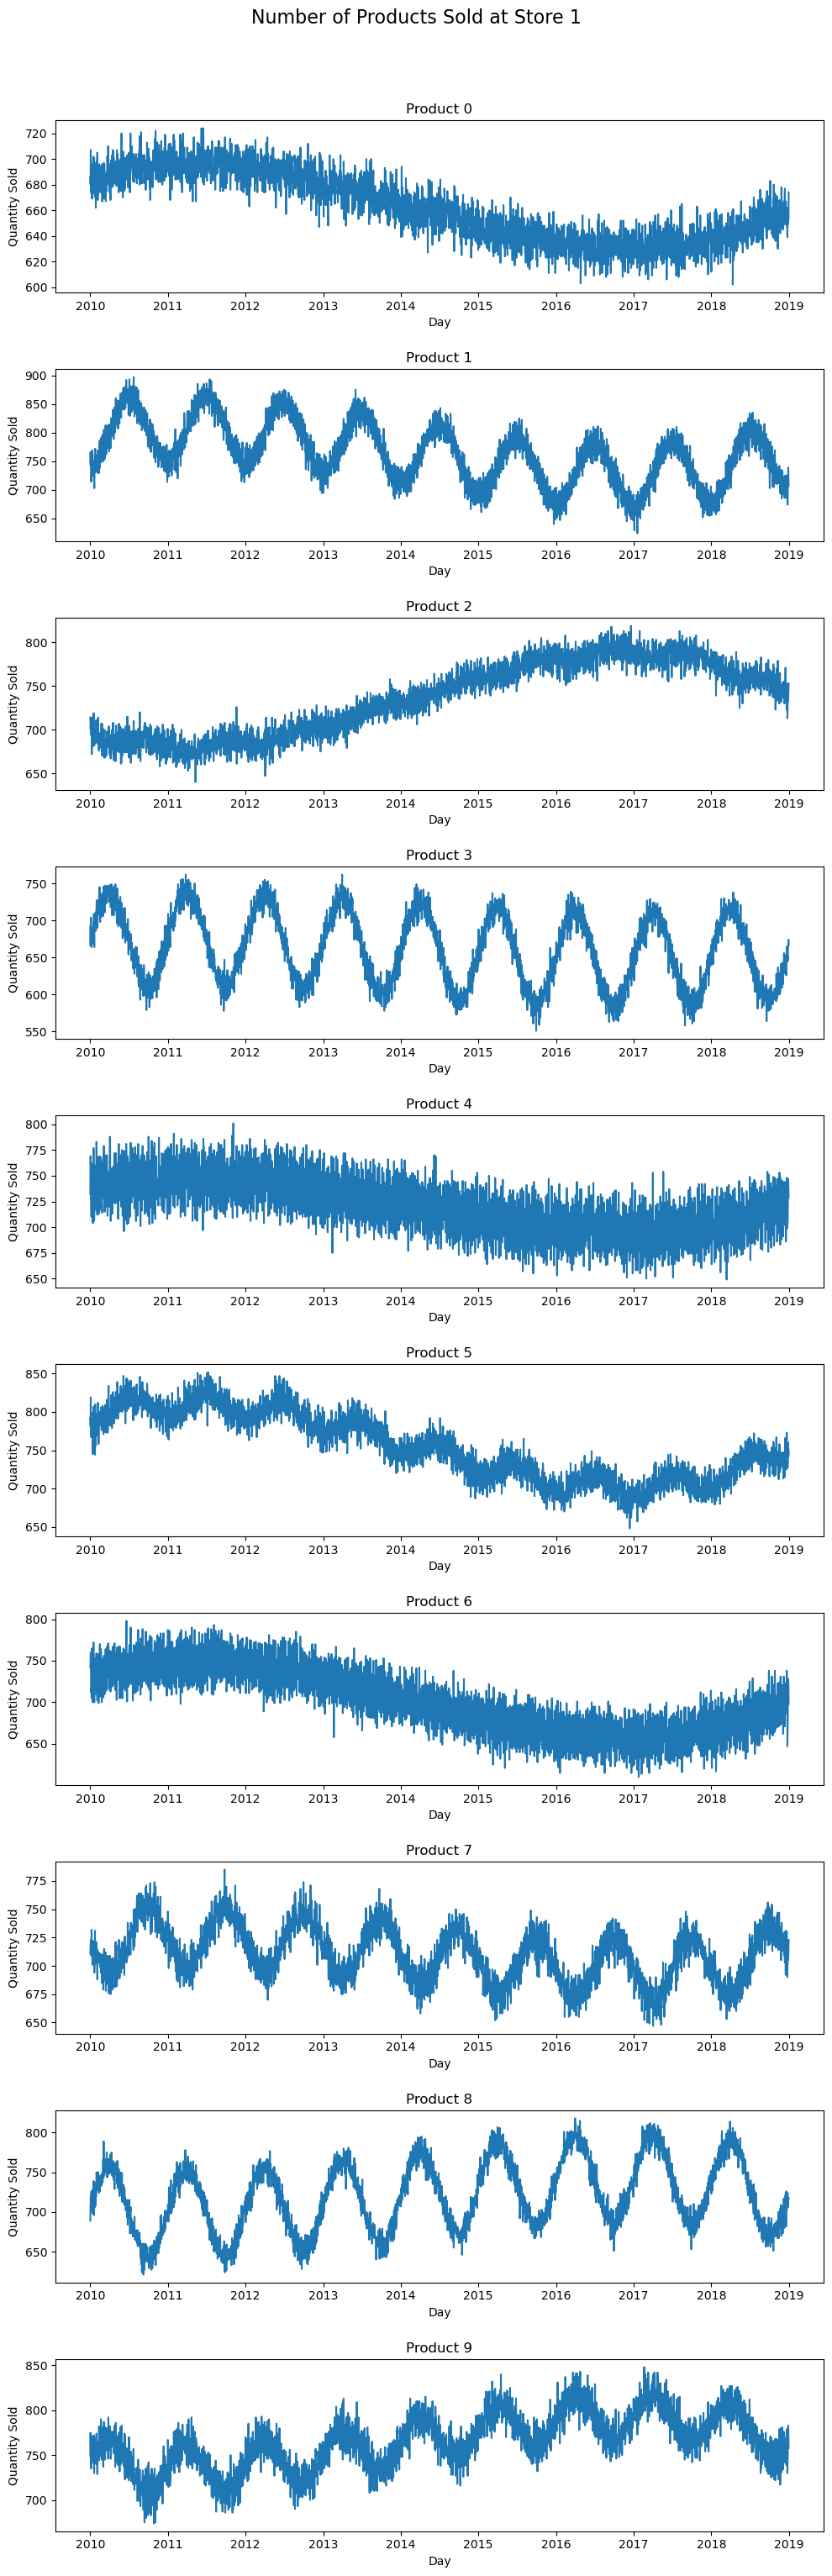

In [20]:
#Get the title
fig_titles = []

for i in range(10):
    fig_titles.append(f"Product {i}")

# Create subplots
n_rows = len(fig_titles)
fig, axes = plt.subplots(nrows=n_rows, ncols=1, figsize = (10, n_rows*3), sharex=False)

# Flatten the axes for easier handling ig there is more than one row
axes = axes if n_rows >1 else [axes]

#plot the graph
for i, col in enumerate(organized_store_data):
    ax = axes[i]
    ax.plot(organized_store_data[f"n_sold_product_{i}"]["Date"], organized_store_data[f"n_sold_product_{i}"]["number_sold"])
    ax.set_title(fig_titles[i], fontsize = 12)
    ax.set_ylabel("Quantity Sold")
    ax.set_xlabel("Day")
    
# Add Overall Title and adjust the layout
fig.suptitle("Number of Products Sold at Store 1", fontsize = 16, y = 1.02)
fig.tight_layout(h_pad=2.0)
plt.show()

### Plotting Each Product at store 2

#### Split for store 2

In [21]:
store_2 = store_split_data(train_dataset, 2)
store_2["store"].unique()

array([2], dtype=int64)

In [22]:
store_2.head()

Date  store  product  number_sold
65740 2010-01-01      2        0          718
65741 2010-01-02      2        0          737
65742 2010-01-03      2        0          729
65743 2010-01-04      2        0          716
65744 2010-01-05      2        0          742

In [23]:
organized_store_data = get_store_data(store_2)

In [24]:
organized_store_data["n_sold_product_0"].head()

Date  store  product  number_sold
65740 2010-01-01      2        0          718
65741 2010-01-02      2        0          737
65742 2010-01-03      2        0          729
65743 2010-01-04      2        0          716
65744 2010-01-05      2        0          742

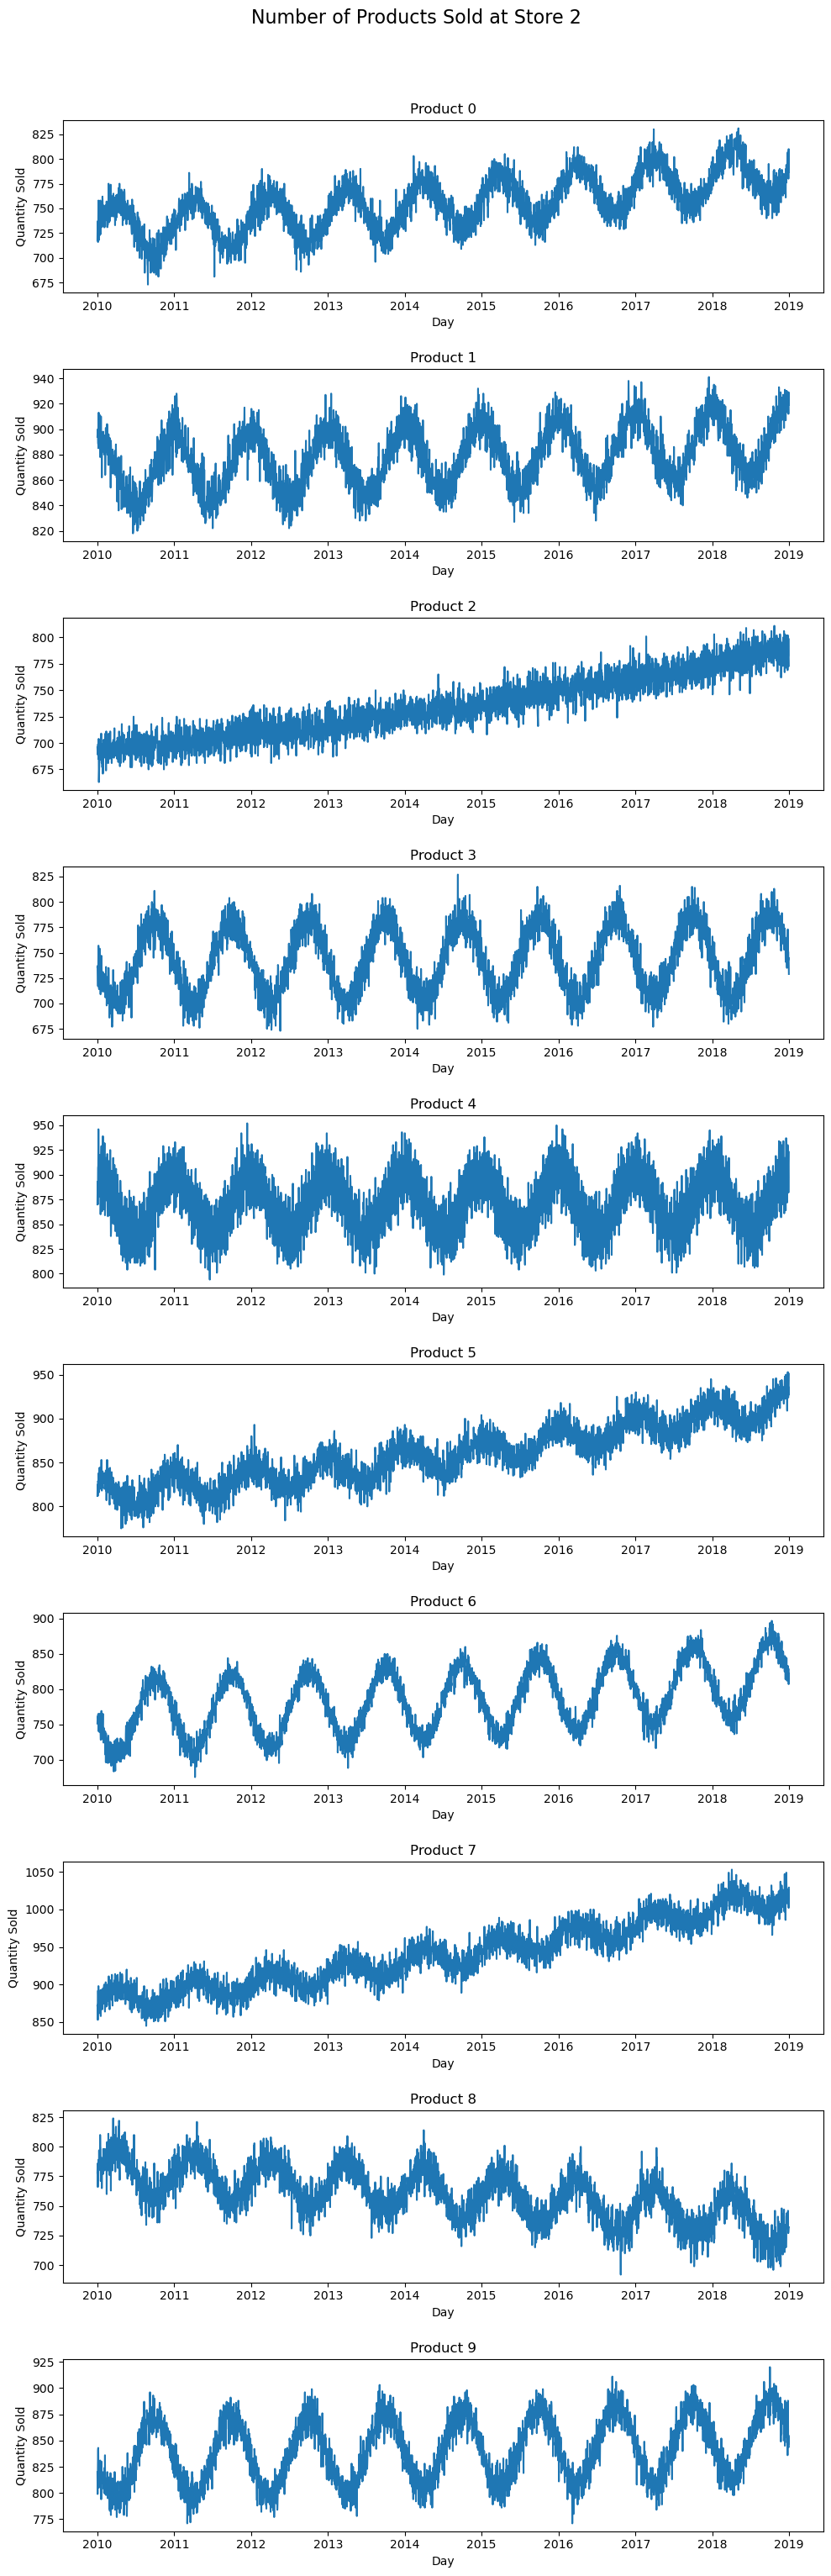

In [25]:
#Get the title
fig_titles = []

for i in range(10):
    fig_titles.append(f"Product {i}")

# Create subplots
n_rows = len(fig_titles)
fig, axes = plt.subplots(nrows=n_rows, ncols=1, figsize = (10, n_rows*3), sharex=False)

# Flatten the axes for easier handling ig there is more than one row
axes = axes if n_rows >1 else [axes]

#plot the graph
for i, col in enumerate(organized_store_data):
    ax = axes[i]
    ax.plot(organized_store_data[f"n_sold_product_{i}"]["Date"], organized_store_data[f"n_sold_product_{i}"]["number_sold"])
    ax.set_title(fig_titles[i], fontsize = 12)
    ax.set_ylabel("Quantity Sold")
    ax.set_xlabel("Day")
    
# Add Overall Title and adjust the layout
fig.suptitle("Number of Products Sold at Store 2", fontsize = 16, y = 1.02)
fig.tight_layout(h_pad=2.0)
plt.show()

### Plotting Each Product at store 2

#### Split for store 2

In [26]:
store_2 = store_split_data(train_dataset, 2)
store_2["store"].unique()

array([2], dtype=int64)

In [27]:
store_2.head()

Date  store  product  number_sold
65740 2010-01-01      2        0          718
65741 2010-01-02      2        0          737
65742 2010-01-03      2        0          729
65743 2010-01-04      2        0          716
65744 2010-01-05      2        0          742

In [28]:
organized_store_data = get_store_data(store_2)

In [29]:
organized_store_data["n_sold_product_2"].head()

Date  store  product  number_sold
72314 2010-01-01      2        2          696
72315 2010-01-02      2        2          689
72316 2010-01-03      2        2          698
72317 2010-01-04      2        2          699
72318 2010-01-05      2        2          699

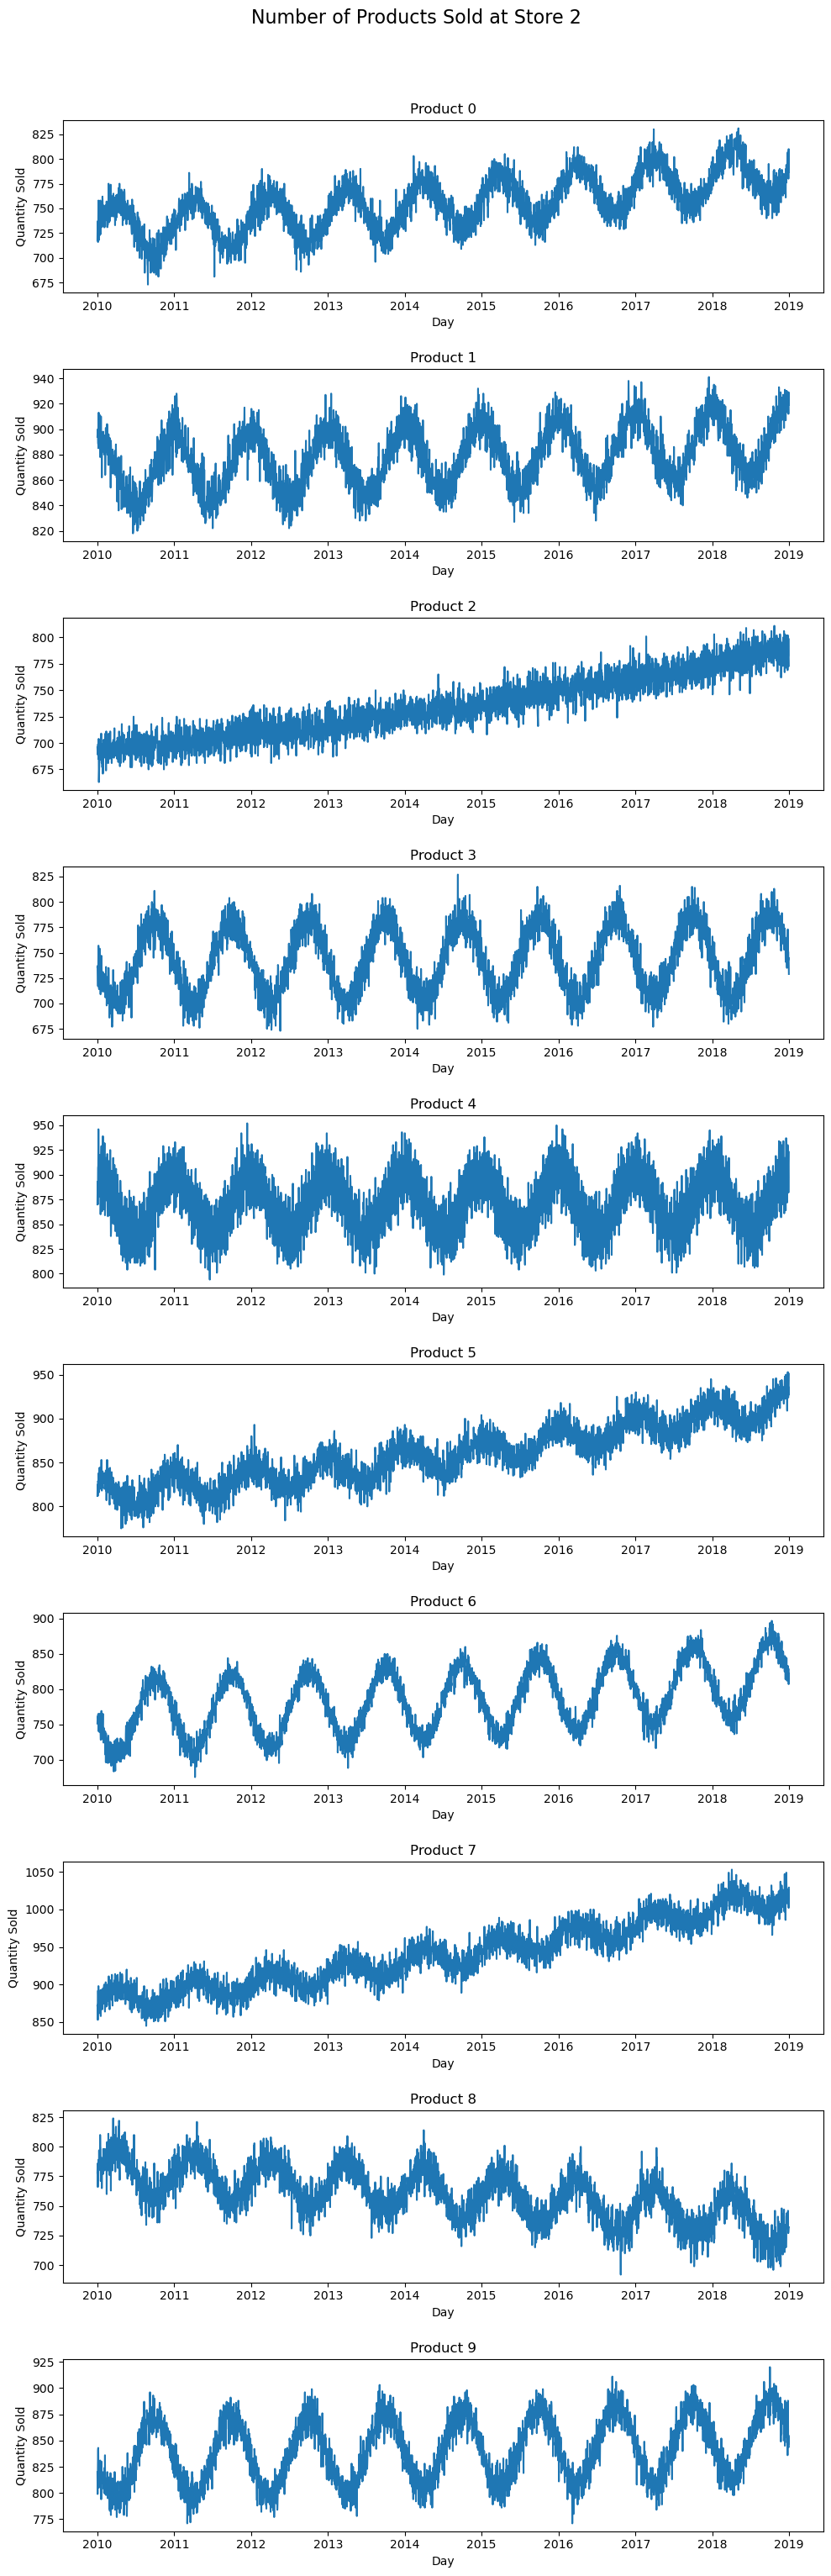

In [30]:
#Get the title
fig_titles = []

for i in range(10):
    fig_titles.append(f"Product {i}")

# Create subplots
n_rows = len(fig_titles)
fig, axes = plt.subplots(nrows=n_rows, ncols=1, figsize = (10, n_rows*3), sharex=False)

# Flatten the axes for easier handling ig there is more than one row
axes = axes if n_rows >1 else [axes]

#plot the graph
for i, col in enumerate(organized_store_data):
    ax = axes[i]
    ax.plot(organized_store_data[f"n_sold_product_{i}"]["Date"], organized_store_data[f"n_sold_product_{i}"]["number_sold"])
    ax.set_title(fig_titles[i], fontsize = 12)
    ax.set_ylabel("Quantity Sold")
    ax.set_xlabel("Day")
    
# Add Overall Title and adjust the layout
fig.suptitle("Number of Products Sold at Store 2", fontsize = 16, y = 1.02)
fig.tight_layout(h_pad=2.0)
plt.show()

### Plotting Each Product at store 3

#### Split for store 3

In [31]:
store_3 = store_split_data(train_dataset, 3)
store_3["store"].unique()

array([3], dtype=int64)

In [32]:
store_3.head()

Date  store  product  number_sold
98610 2010-01-01      3        0          316
98611 2010-01-02      3        0          301
98612 2010-01-03      3        0          304
98613 2010-01-04      3        0          301
98614 2010-01-05      3        0          318

In [33]:
organized_store_data = get_store_data(store_3)

In [34]:
organized_store_data["n_sold_product_0"].head()

Date  store  product  number_sold
98610 2010-01-01      3        0          316
98611 2010-01-02      3        0          301
98612 2010-01-03      3        0          304
98613 2010-01-04      3        0          301
98614 2010-01-05      3        0          318

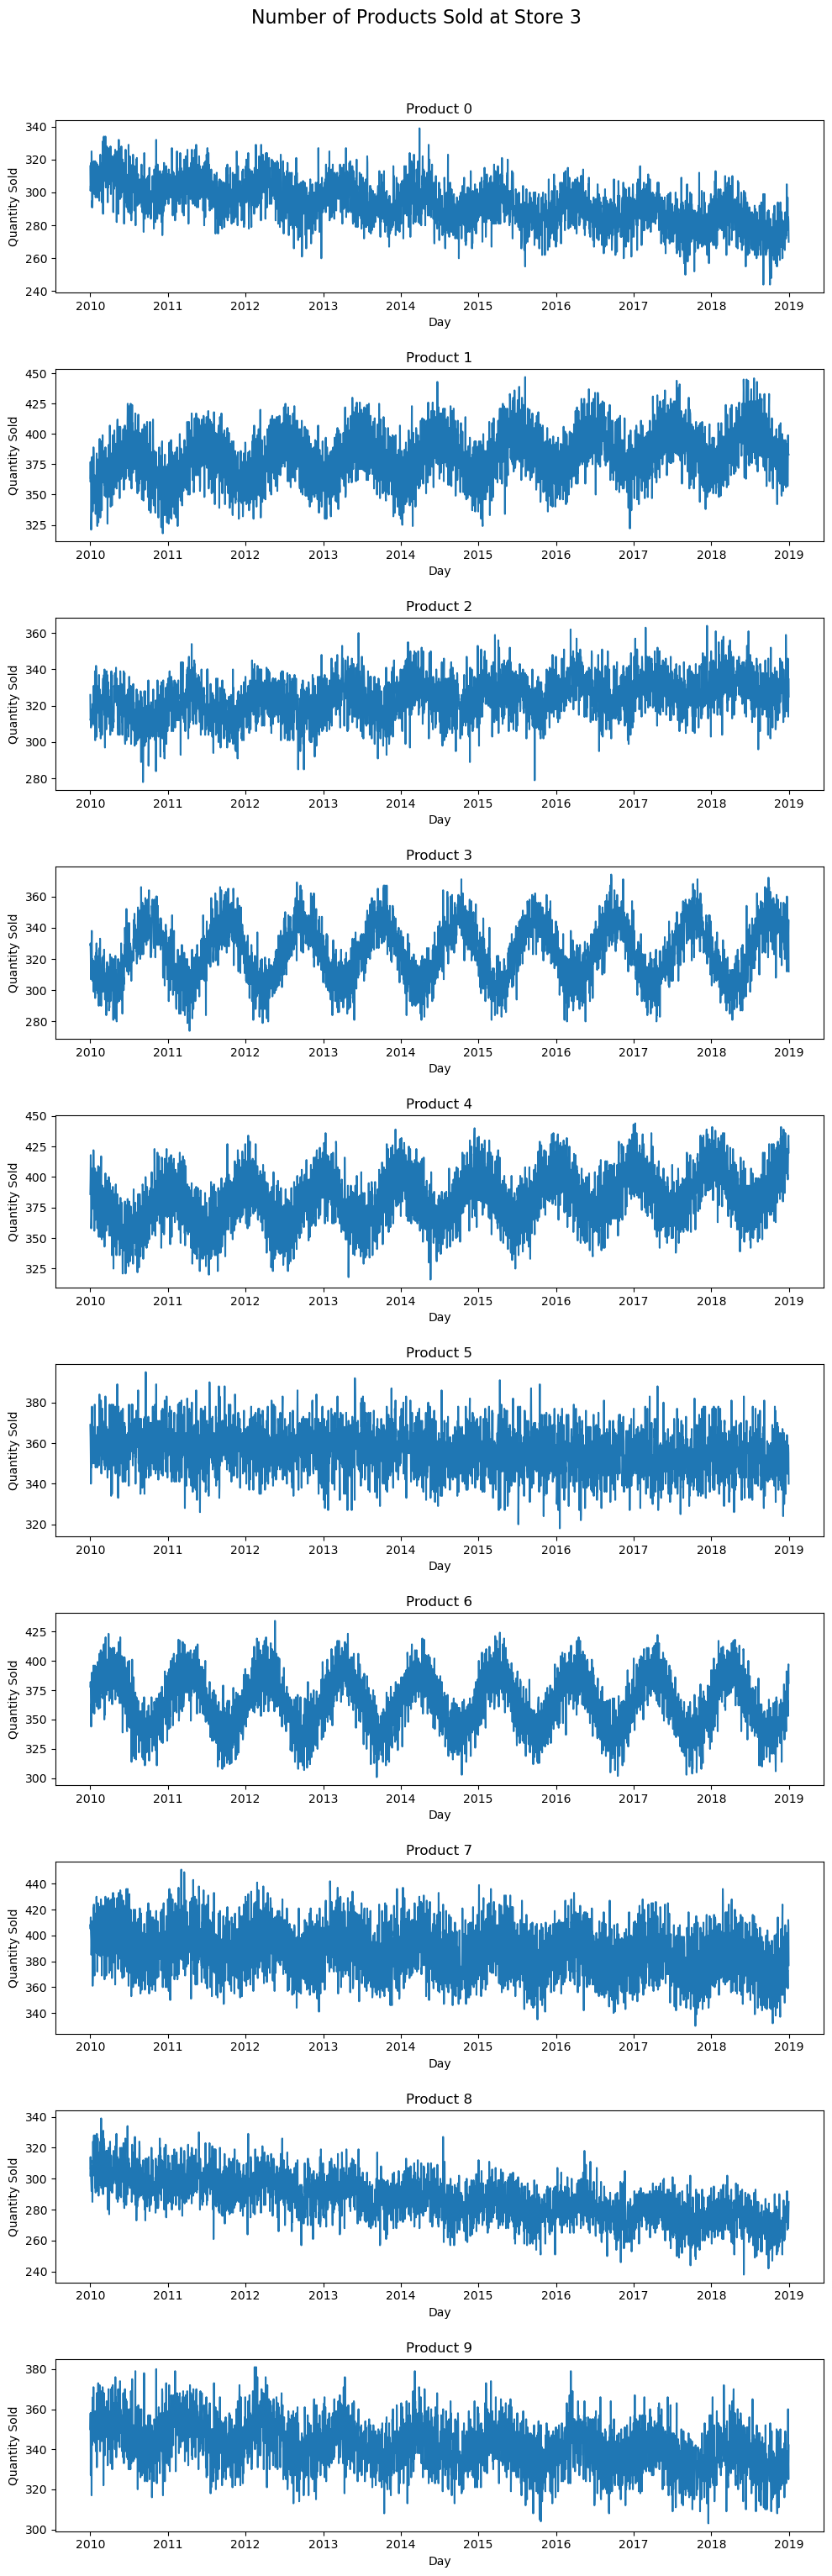

In [35]:
#Get the title
fig_titles = []

for i in range(10):
    fig_titles.append(f"Product {i}")

# Create subplots
n_rows = len(fig_titles)
fig, axes = plt.subplots(nrows=n_rows, ncols=1, figsize = (10, n_rows*3), sharex=False)

# Flatten the axes for easier handling ig there is more than one row
axes = axes if n_rows >1 else [axes]

#plot the graph
for i, col in enumerate(organized_store_data):
    ax = axes[i]
    ax.plot(organized_store_data[f"n_sold_product_{i}"]["Date"], organized_store_data[f"n_sold_product_{i}"]["number_sold"])
    ax.set_title(fig_titles[i], fontsize = 12)
    ax.set_ylabel("Quantity Sold")
    ax.set_xlabel("Day")
    
# Add Overall Title and adjust the layout
fig.suptitle("Number of Products Sold at Store 3", fontsize = 16, y = 1.02)
fig.tight_layout(h_pad=2.0)
plt.show()

### Plotting Each Product at store 4

#### Split for store 4

In [36]:
store_4 = store_split_data(train_dataset, 4)
store_4["store"].unique()

array([4], dtype=int64)

In [37]:
store_4.head()

Date  store  product  number_sold
131480 2010-01-01      4        0          938
131481 2010-01-02      4        0          932
131482 2010-01-03      4        0          933
131483 2010-01-04      4        0          931
131484 2010-01-05      4        0          939

In [38]:
organized_store_data = get_store_data(store_4)

In [39]:
organized_store_data["n_sold_product_0"].head()

Date  store  product  number_sold
131480 2010-01-01      4        0          938
131481 2010-01-02      4        0          932
131482 2010-01-03      4        0          933
131483 2010-01-04      4        0          931
131484 2010-01-05      4        0          939

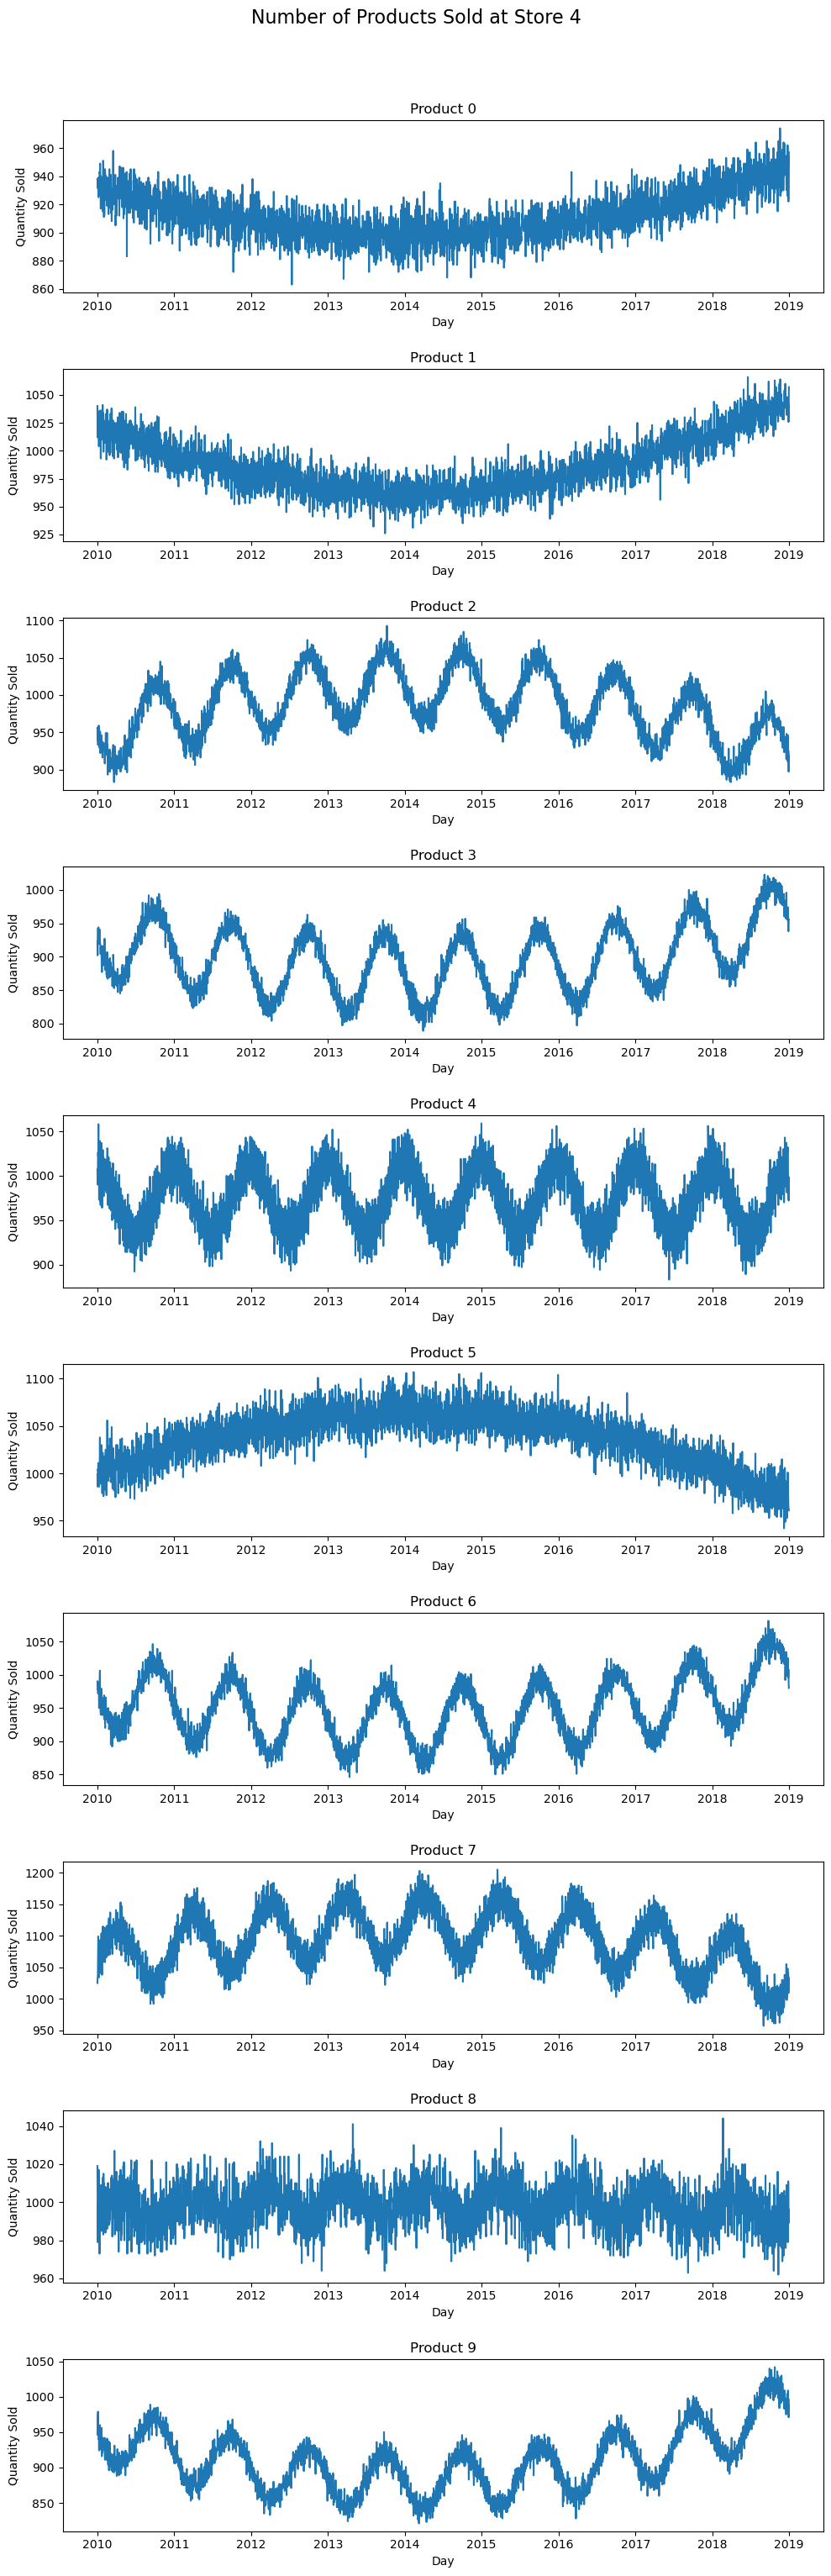

In [40]:
#Get the title
fig_titles = []

for i in range(10):
    fig_titles.append(f"Product {i}")

# Create subplots
n_rows = len(fig_titles)
fig, axes = plt.subplots(nrows=n_rows, ncols=1, figsize = (10, n_rows*3), sharex=False)

# Flatten the axes for easier handling ig there is more than one row
axes = axes if n_rows >1 else [axes]

#plot the graph
for i, col in enumerate(organized_store_data):
    ax = axes[i]
    ax.plot(organized_store_data[f"n_sold_product_{i}"]["Date"], organized_store_data[f"n_sold_product_{i}"]["number_sold"])
    ax.set_title(fig_titles[i], fontsize = 12)
    ax.set_ylabel("Quantity Sold")
    ax.set_xlabel("Day")
    
# Add Overall Title and adjust the layout
fig.suptitle("Number of Products Sold at Store 4", fontsize = 16, y = 1.02)
fig.tight_layout(h_pad=2.0)
plt.show()

### Plotting Each Product at store 5

#### Split for store 5

In [41]:
store_5 = store_split_data(train_dataset, 5)
store_5["store"].unique()

array([5], dtype=int64)

In [42]:
store_5.head()

Date  store  product  number_sold
164350 2010-01-01      5        0          861
164351 2010-01-02      5        0          864
164352 2010-01-03      5        0          858
164353 2010-01-04      5        0          853
164354 2010-01-05      5        0          870

In [43]:
organized_store_data = get_store_data(store_5)

In [44]:
organized_store_data["n_sold_product_0"].head()

Date  store  product  number_sold
164350 2010-01-01      5        0          861
164351 2010-01-02      5        0          864
164352 2010-01-03      5        0          858
164353 2010-01-04      5        0          853
164354 2010-01-05      5        0          870

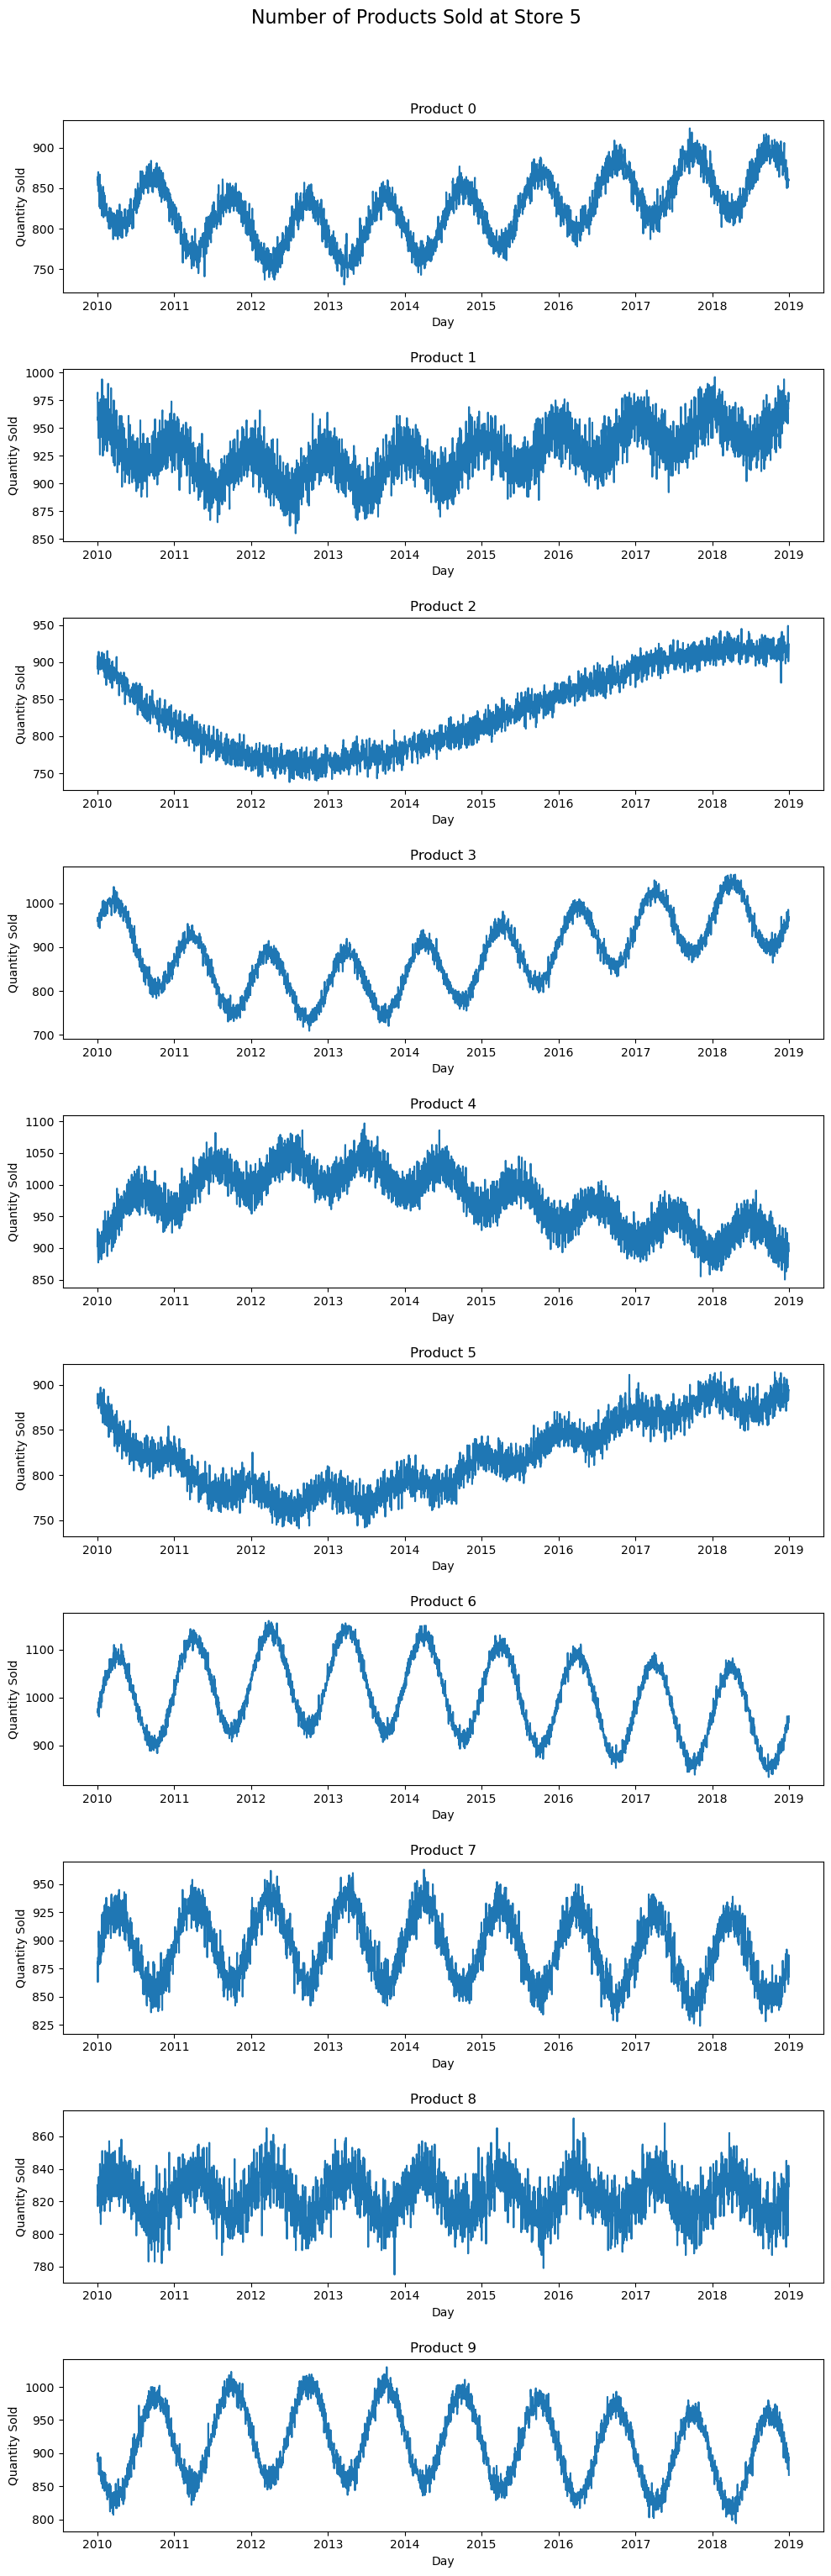

In [45]:
#Get the title
fig_titles = []

for i in range(10):
    fig_titles.append(f"Product {i}")

# Create subplots
n_rows = len(fig_titles)
fig, axes = plt.subplots(nrows=n_rows, ncols=1, figsize = (10, n_rows*3), sharex=False)

# Flatten the axes for easier handling ig there is more than one row
axes = axes if n_rows >1 else [axes]

#plot the graph
for i, col in enumerate(organized_store_data):
    ax = axes[i]
    ax.plot(organized_store_data[f"n_sold_product_{i}"]["Date"], organized_store_data[f"n_sold_product_{i}"]["number_sold"])
    ax.set_title(fig_titles[i], fontsize = 12)
    ax.set_ylabel("Quantity Sold")
    ax.set_xlabel("Day")
    
# Add Overall Title and adjust the layout
fig.suptitle("Number of Products Sold at Store 5", fontsize = 16, y = 1.02)
fig.tight_layout(h_pad=2.0)
plt.show()

### Plotting Each Product at store 6

#### Split for store 6

In [46]:
store_6 = store_split_data(train_dataset, 6)
store_6["store"].unique()

array([6], dtype=int64)

In [47]:
store_6.head()

Date  store  product  number_sold
197220 2010-01-01      6        0          803
197221 2010-01-02      6        0          817
197222 2010-01-03      6        0          808
197223 2010-01-04      6        0          814
197224 2010-01-05      6        0          807

In [48]:
organized_store_data = get_store_data(store_6)

In [49]:
organized_store_data["n_sold_product_0"].head()

Date  store  product  number_sold
197220 2010-01-01      6        0          803
197221 2010-01-02      6        0          817
197222 2010-01-03      6        0          808
197223 2010-01-04      6        0          814
197224 2010-01-05      6        0          807

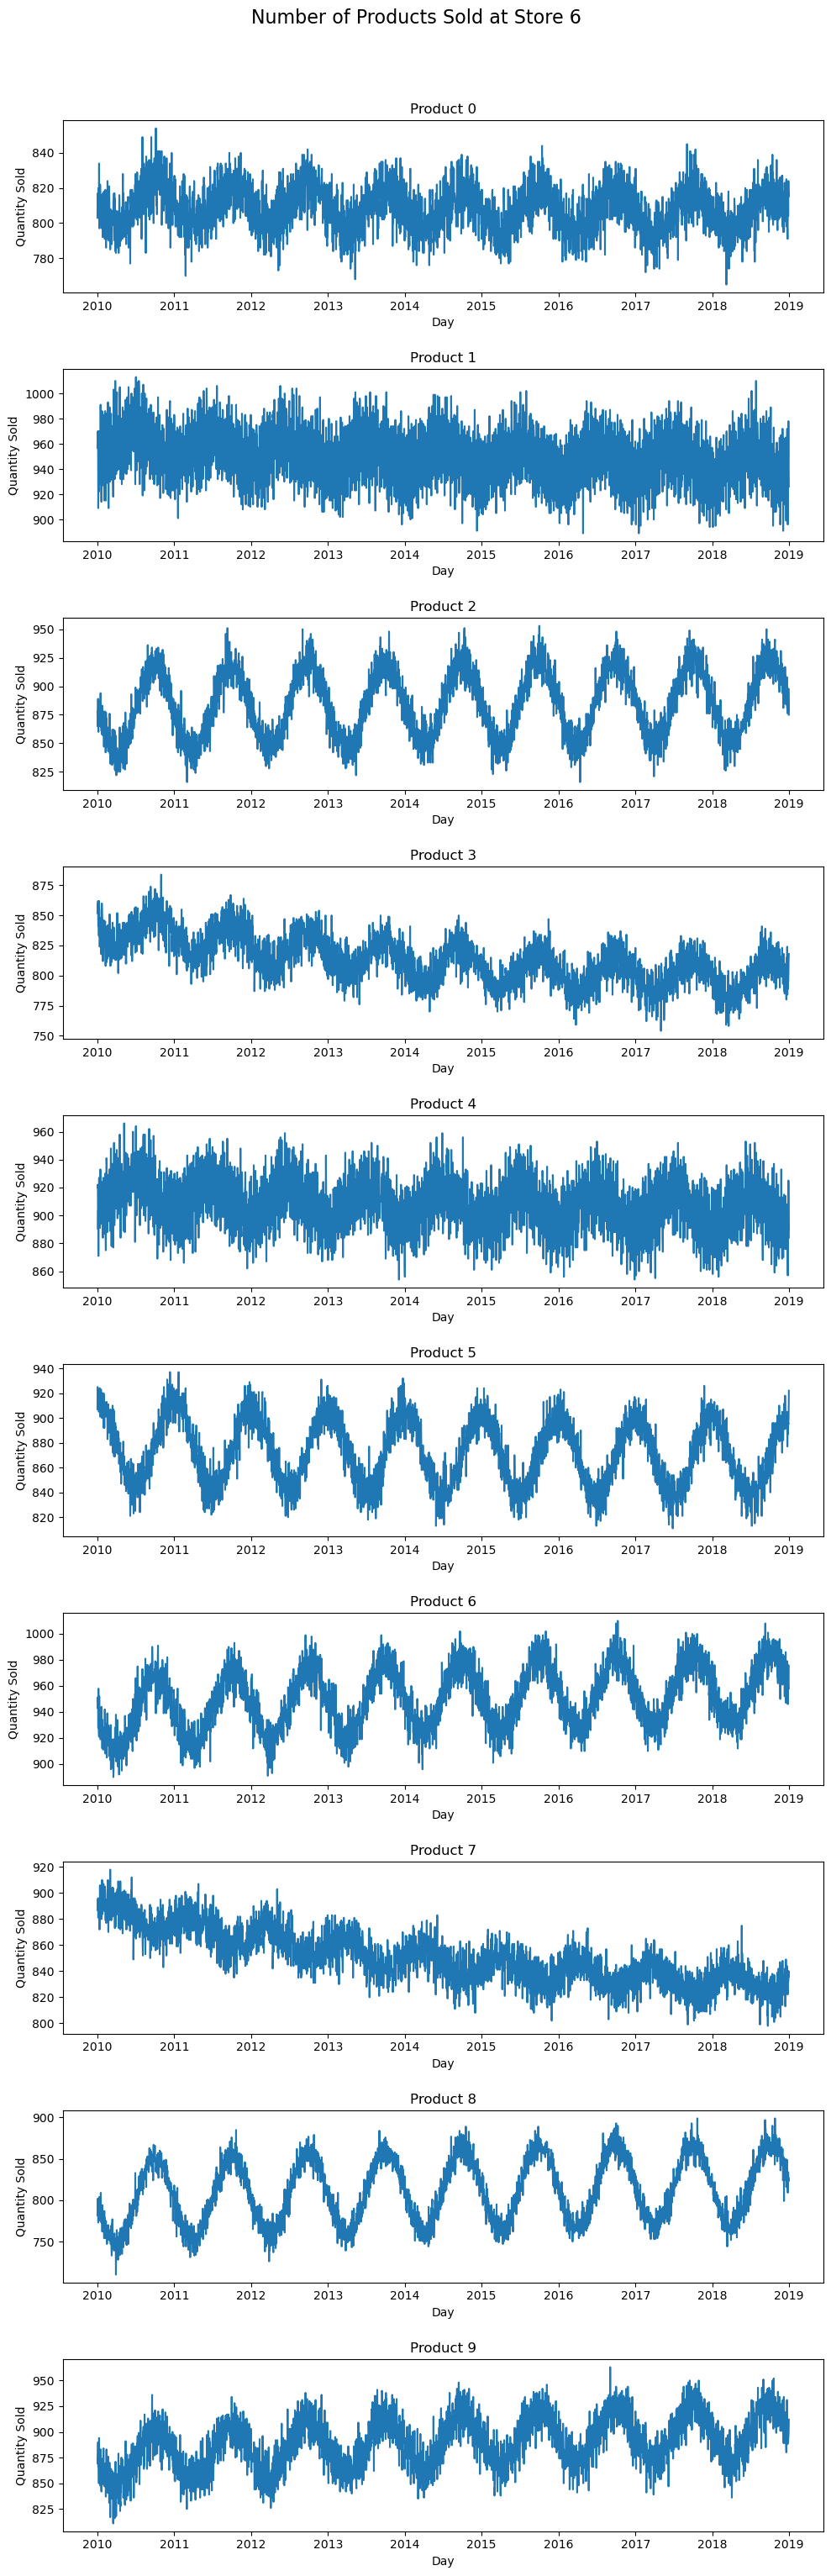

In [50]:
#Get the title
fig_titles = []

for i in range(10):
    fig_titles.append(f"Product {i}")

# Create subplots
n_rows = len(fig_titles)
fig, axes = plt.subplots(nrows=n_rows, ncols=1, figsize = (10, n_rows*3), sharex=False)

# Flatten the axes for easier handling ig there is more than one row
axes = axes if n_rows >1 else [axes]

#plot the graph
for i, col in enumerate(organized_store_data):
    ax = axes[i]
    ax.plot(organized_store_data[f"n_sold_product_{i}"]["Date"], organized_store_data[f"n_sold_product_{i}"]["number_sold"])
    ax.set_title(fig_titles[i], fontsize = 12)
    ax.set_ylabel("Quantity Sold")
    ax.set_xlabel("Day")
    
# Add Overall Title and adjust the layout
fig.suptitle("Number of Products Sold at Store 6", fontsize = 16, y = 1.02)
fig.tight_layout(h_pad=2.0)
plt.show()

## Data Preprocessing

In [51]:
def cleaned_store_data(df, store_number, product_number):
    store = store_split_data(df, store_number) #split the main data to stores
    store = get_store_data(store) #get the store data where it will be splitted into product categories
    store = store[f"n_sold_product_{product_number}"] #get the desired product number
    store = store.drop(columns = ["store", "product"]) #this data will be passed to the prophet
    store.rename(columns={"Date":"ds", "number_sold":"y"}, inplace = True) #rename the columns so that prophet will accept it
    return store

In [52]:
cleaned_store_data(train_dataset, 0, 1)

ds    y
3287 2010-01-01  851
3288 2010-01-02  843
3289 2010-01-03  847
3290 2010-01-04  855
3291 2010-01-05  866
...         ...  ...
6569 2018-12-27  708
6570 2018-12-28  702
6571 2018-12-29  698
6572 2018-12-30  700
6573 2018-12-31  706

[3287 rows x 2 columns]

## Model Making

In [60]:
#Making Forecast function
def make_forecast(df, store, product):
    #initiate the model
    model = Prophet(changepoint_prior_scale = 0.5)

    #fit the model
    store_data = cleaned_store_data(df, store, product)
    model.fit(store_data)

    #predict future
    future = model.make_future_dataframe(periods=365) #1 year prediction
    forecast = model.predict(future)

    #plot the forecast
    fig = model.plot(forecast)


## Predicting for store 0 product 0

01:37:37 - cmdstanpy - INFO - Chain [1] start processing
01:37:38 - cmdstanpy - INFO - Chain [1] done processing


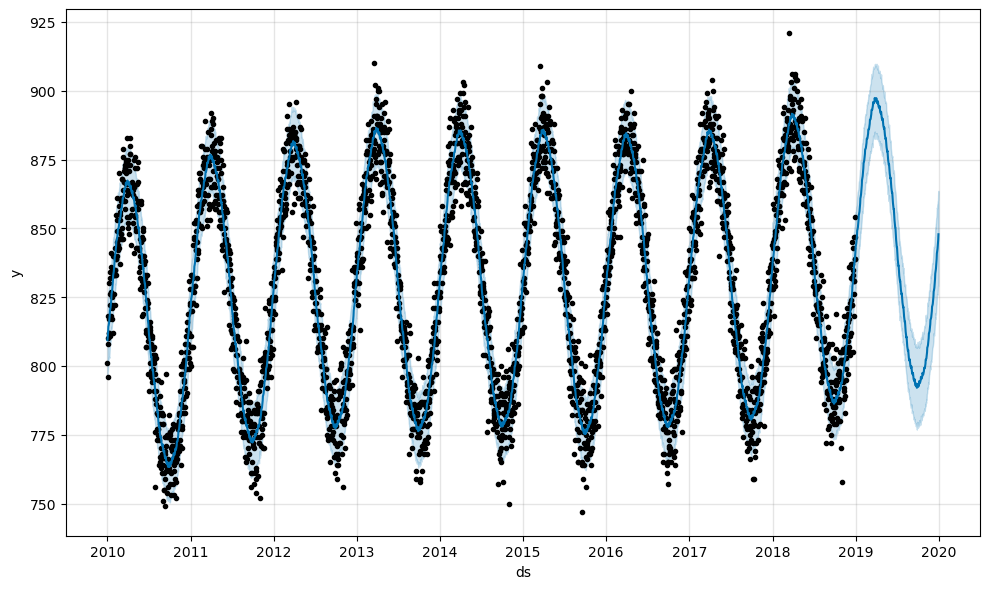

In [54]:
make_forecast(train_dataset, 0, 0)

## Attempt on Test Data

01:39:08 - cmdstanpy - INFO - Chain [1] start processing
01:39:08 - cmdstanpy - INFO - Chain [1] done processing


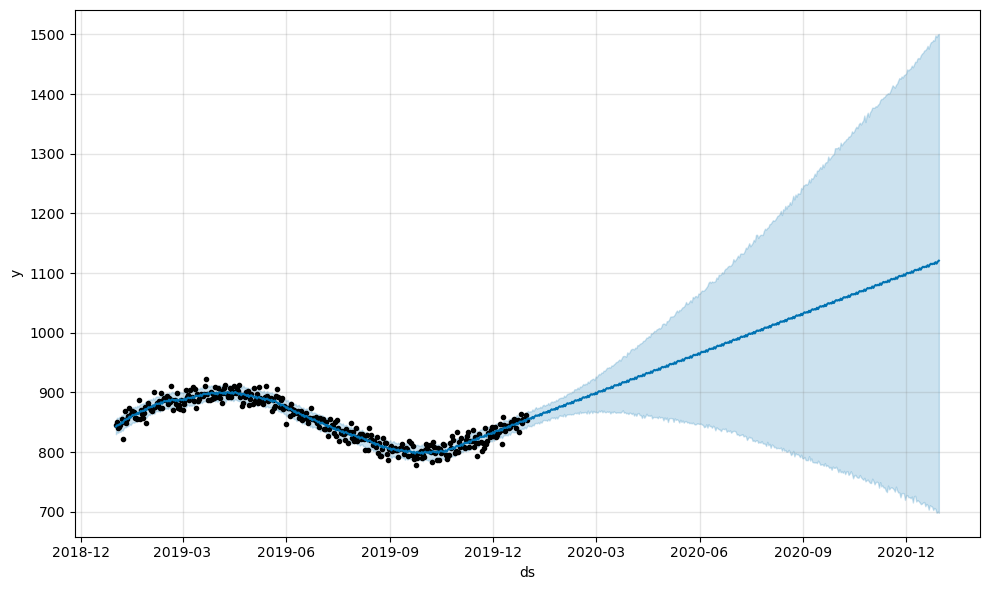

In [59]:
make_forecast(test_dataset, 0,0)

As the model looks further into the future, the uncertainty grows, much like predicting the weather weeks ahead. Initially, it follows the data closely, learning from past trends, but as it ventures into the unknown—where it has less information—its confidence begins to waver. This is why the prediction range widens, showing that while the model has learned patterns from the past, it struggles to predict a full year ahead with the same level of accuracy.